# ***Simulating 2D Ising Model using Metropolis algorithm***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [1]:
using Plots, ProgressMeter, JLD, Statistics

include("Q1-Ising2D.jl")

figpath = "../../Figs/Q1/"
datapath = "../../Data/Q1/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

In [24]:
βList = [hcat(0.0:0.02:0.25); hcat(0.31:0.006:0.55); hcat(0.56:0.02:1.0)]
Llist = [5, 10, 15]
runnum = 50
Data = zeros(4, length(βList), runnum, length(Llist))

PRG = Progress(length(βList) * runnum * length(Llist))
for n ∈ 1:runnum
    for i ∈ 1:length(βList)
        for l ∈ 1:length(Llist)
            L = Llist[l]
            β = βList[i]
            Parameters = Dict(
                :dim => L,
                :MCLSize => 1000,
                :NLSize => 1000,
                :SkipNum => 200,
                :ProgBar => false)
            Data[:, i, n, l] = [Ising2D.IsingModel(β; Parameters...)...]
            next!(PRG)
        end
    end
end
save(datapath * "Data.jld", "Data", Data)

Progress: 100%|█████████████████████████████████████████| Time: 5:48:02


In [ ]:
# βList = [hcat(0.0:0.02:0.25); hcat(0.31:0.006:0.55); hcat(0.56:0.02:1.0)]
# Llist = [5, 10, 15]
# runnum = 50
# Data = load(datapath * "Data.jld")["Data"]

In [5]:
MeanData = zeros(4, length(βList), length(Llist))
EbarData = zeros(4, length(βList), length(Llist))
for i ∈ 1:length(βList)
    for l ∈ 1:length(Llist)
        MeanData[1, i, l] = mean(Data[1, i, :, l])
        MeanData[2, i, l] = mean(Data[2, i, :, l])
        MeanData[3, i, l] = mean(Data[3, i, :, l])
        MeanData[4, i, l] = mean(Data[4, i, :, l])
        EbarData[1, i, l] = std(Data[1, i, :, l])
        EbarData[2, i, l] = std(Data[2, i, :, l])
        EbarData[3, i, l] = std(Data[3, i, :, l])
        EbarData[4, i, l] = std(Data[4, i, :, l])
    end
end

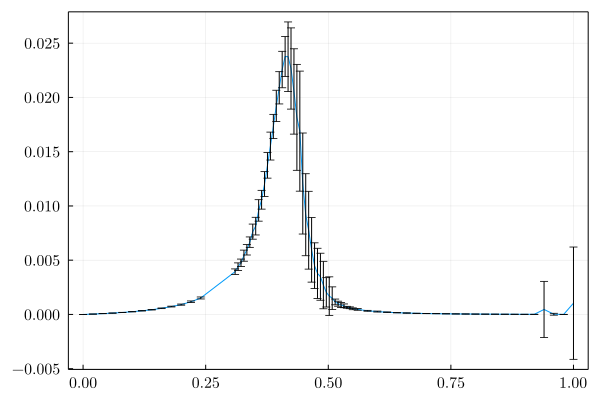

In [9]:
plot(βList, MeanData[4, :, 3], yerr = EbarData[4, :, 3])

In [25]:
rnum = 50
Llist = hcat(4:20)
βzoom = hcat(0.35:0.001:0.45)
EXPData = zeros(4, length(βzoom), length(Llist), rnum)
PRG = Progress(length(βzoom) * rnum)
for n ∈ 1:rnum
    for i ∈ 1:length(βzoom)
        for l ∈ 1:length(Llist)
            L = Llist[l]
            β = βzoom[i]
            Parameters = Dict(
                :dim => L,
                :MCLSize => 1000,
                :NLSize => 1000,
                :SkipNum => 200,
                :ProgBar => false)
            EXPData[:, i, l, n] = [Ising2D.IsingModel(β; Parameters...)...]
        end
        next!(PRG)
    end
end
save(datapath * "EXPData.jld", "EXPData", EXPData)

Progress: 100%|█████████████████████████████████████████| Time: 1:03:54


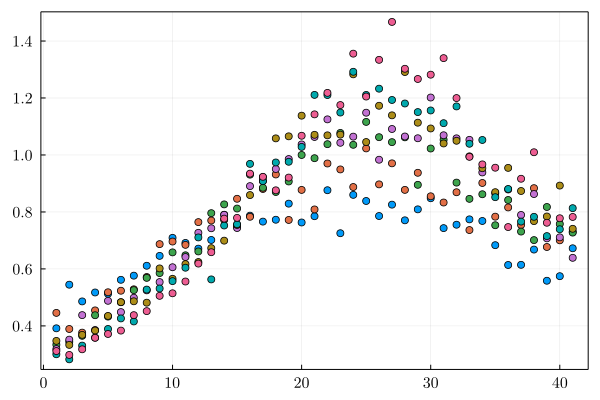

In [47]:
scatter(Llist[1]^2 .* EXPData[3, :, 1])
scatter!(Llist[2]^2 .* EXPData[3, :, 2])
scatter!(Llist[3]^2 .* EXPData[3, :, 3])
scatter!(Llist[4]^2 .* EXPData[3, :, 4])
scatter!(Llist[5]^2 .* EXPData[3, :, 5])
scatter!(Llist[6]^2 .* EXPData[3, :, 6])
scatter!(Llist[7]^2 .* EXPData[3, :, 7])

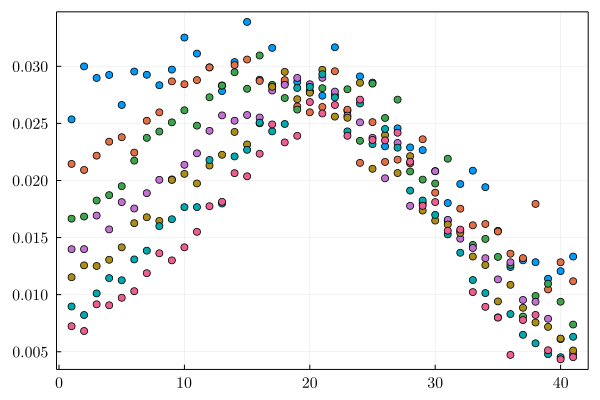

In [34]:
scatter(EXPData[4, :, 1])
scatter!(EXPData[4, :, 2])
scatter!(EXPData[4, :, 3])
scatter!(EXPData[4, :, 4])
scatter!(EXPData[4, :, 5])
scatter!(EXPData[4, :, 6])
scatter!(EXPData[4, :, 7])

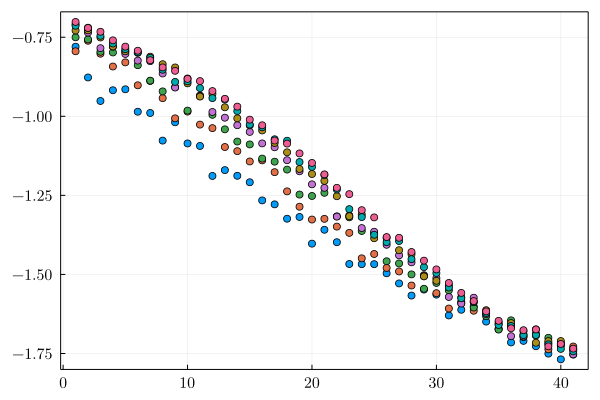

In [35]:
scatter(EXPData[1, :, 1])
scatter!(EXPData[1, :, 2])
scatter!(EXPData[1, :, 3])
scatter!(EXPData[1, :, 4])
scatter!(EXPData[1, :, 5])
scatter!(EXPData[1, :, 6])
scatter!(EXPData[1, :, 7])

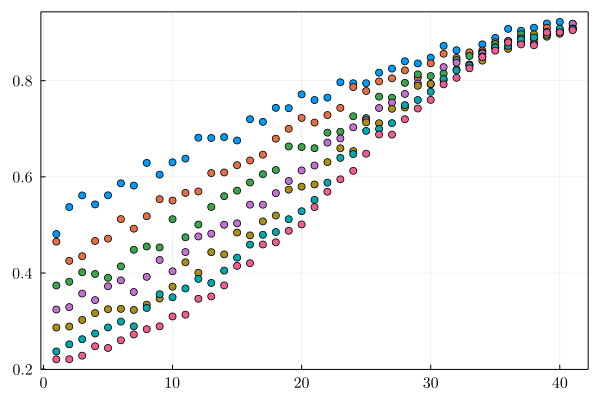

In [36]:
scatter(EXPData[2, :, 1])
scatter!(EXPData[2, :, 2])
scatter!(EXPData[2, :, 3])
scatter!(EXPData[2, :, 4])
scatter!(EXPData[2, :, 5])
scatter!(EXPData[2, :, 6])
scatter!(EXPData[2, :, 7])

In [38]:
argmax(EXPData[4, :, 5])

21

In [45]:
betamax = []
Xmax = []
for l ∈ 1:length(Llist)
    index = argmax(EXPData[3, :, l])
    push!(betamax, 1 / βzoom[index])
    push!(Xmax, Llist[l]^2 * EXPData[3, index, l])
end

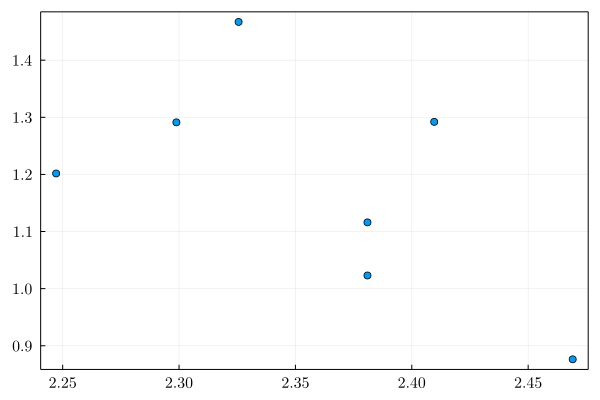

In [46]:
scatter(betamax, Xmax)